# Importing required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from pca import PCA
from nonlin import *


In [5]:
dataset = np.loadtxt('MI_timesteps.txt')
for i in range(1,10):
    print(max(dataset[:,i]))

M =12000
orig_pt = dataset[1001:M+1001,:]
orig_pt.shape
dataset = dataset[1001:,:]
orig_pt = dataset[:M,:]
orig_pt.shape

199.0
200.0
154.0
40.0
29.0
27.0
7.0
3.0
190.0


(12000, 10)

10.090715941516432 930.022634128684 -369.17213317908323


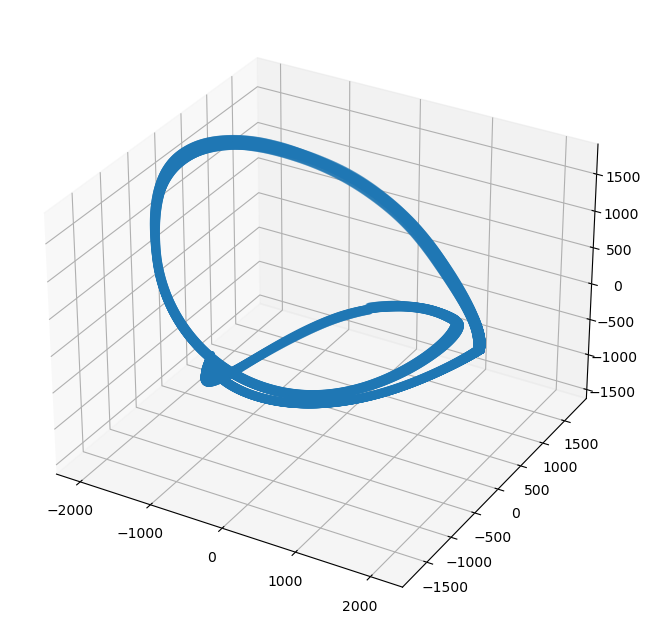

In [6]:
from sklearn.decomposition import PCA

dataset = np.loadtxt('MI_timesteps.txt')
offset = 1000
dataset = dataset[offset+1:,:]
M = 12000
delays =351

x = []
for i in range(M):
    x.append(dataset[i:delays+i,1:4].flatten())
x = np.vstack(x)

comp = PCA(3)
#U, S, _ = comp.svd(full_matrices=False)
U = comp.fit_transform(x)
#ncomp = comp.energy_loss(0.1)
#print(ncomp)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(U[:, 0], U[:, 1], U[:, 2])

print(U[0, 0], U[0, 1], U[0, 2])


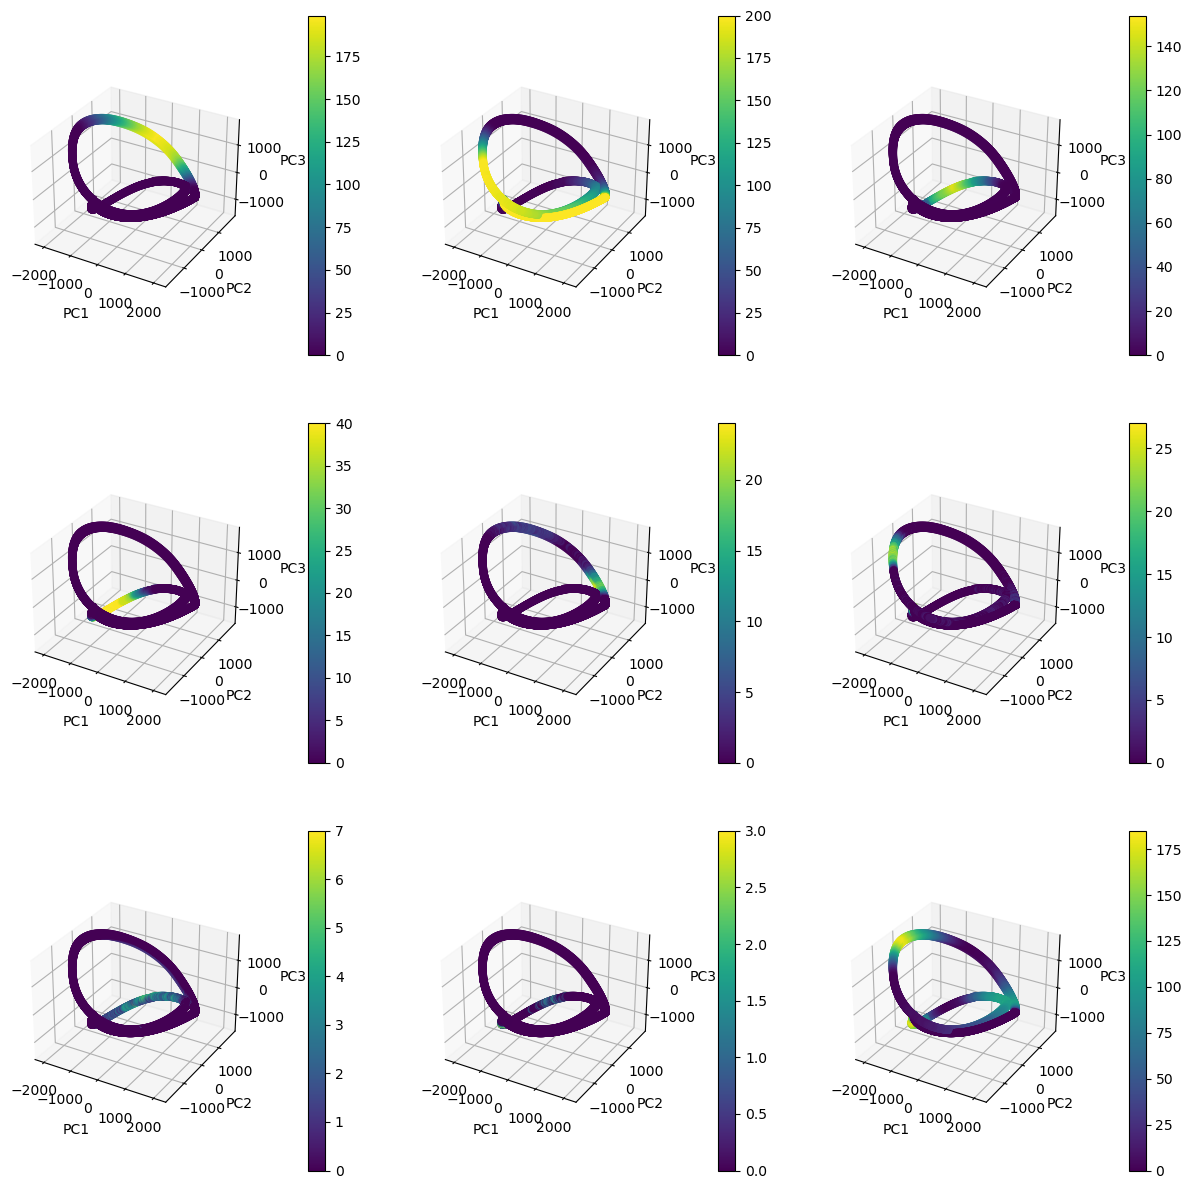

In [7]:
orig_pt = dataset[:M,:]

fig = plt.figure(figsize=(15,15))
for i in range(1,10):
    ax = fig.add_subplot(3, 3, i, projection='3d')
    ma = ax.scatter(U[:, 0], U[:, 1], U[:, 2], c=orig_pt[:, i])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.colorbar(ma, pad = 0.17)
    plt.show

Total arc length: 21942.15309175138


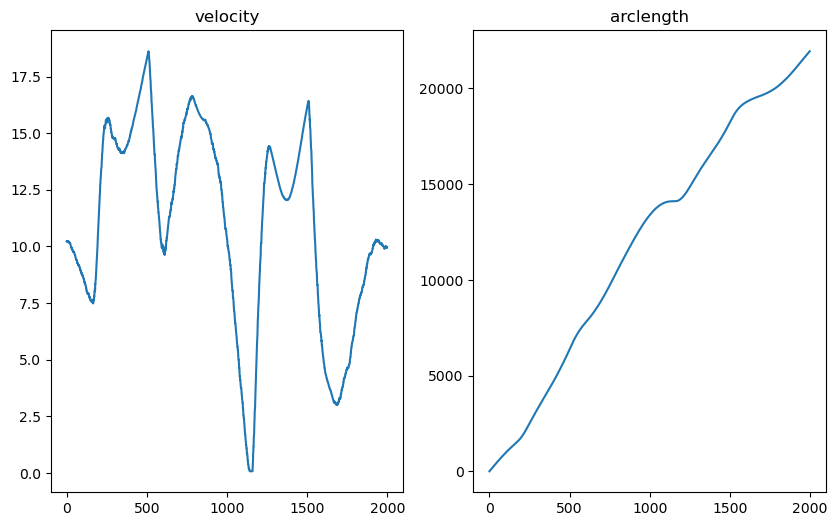

In [8]:
import math

def compute_arc_length(x, y, z):
    """
    Compute the total arc length and velocity of a curve defined by discrete points (x, y, z).
    
    Parameters:
        x, y, z: NumPy arrays representing the coordinates of the points.

    Returns:
        Total arc length of the curve.
    """
    n = len(x)

    # Calculate the distance between consecutive points
    dx = np.diff(x)
    dy = np.diff(y)
    dz = np.diff(z)
    dt = 1

    # Compute the arc length between consecutive points using the Euclidean distance formula
    arclength = np.sqrt(dx**2 + dy**2 + dz**2)
    velocity = np.sqrt(dx**2 + dy**2 + dz**2)/dt

    return arclength, velocity

arclength, velocity = compute_arc_length(U[:2000, 0], U[:2000, 1], U[:2000, 2])
cum_arclength = np.cumsum(arclength)
total_arclength = np.sum(arclength)

#plt.plot(np.cumsum(segment_lengths[1:len(U)]), segment_lengths[1:len(U)])

fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].set_title("velocity")
ax[0].plot(velocity)
ax[1].set_title("arclength")
ax[1].plot(cum_arclength)



print("Total arc length:", total_arclength)


In [ ]:
#Plotting the original data of first measurement area over 7 days
plt.plot(dataset[:,1], c='blue')

In [10]:
L = 1000
eps = 100.0
period = 2000

arclens_data = np.expand_dims(np.array(cum_arclength), 1)
period_speeds_data = np.expand_dims(np.array(velocity), 1)
centers = arclens_data[np.random.choice(range(arclens_data.shape[0]), replace=False, size=L)]
phi, C, res = nonlin_func_approx(arclens_data, period_speeds_data, centers=centers, eps=eps)

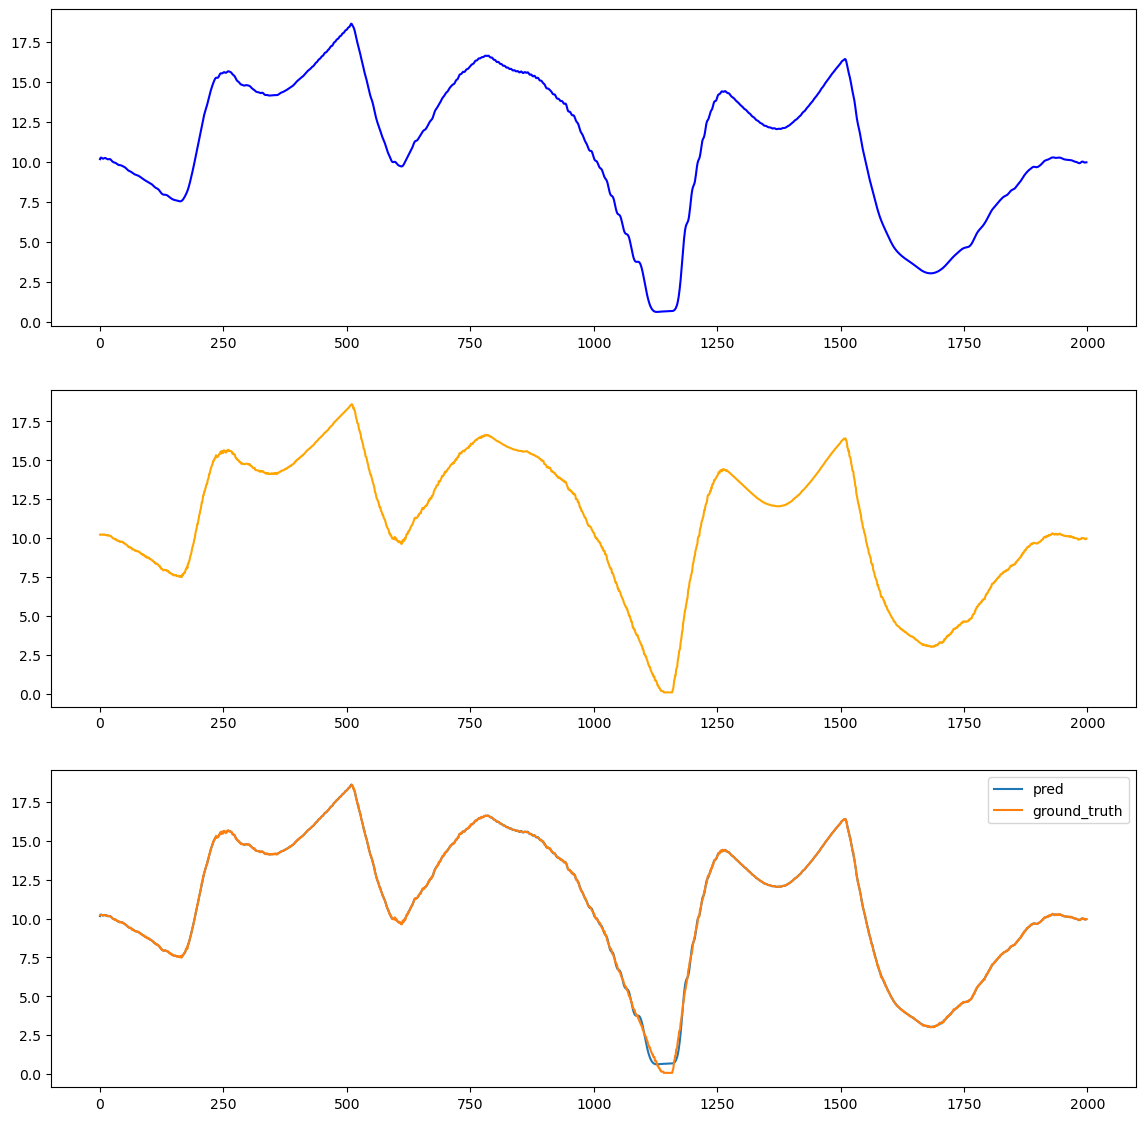

In [11]:
predicted_speeds = phi @ C
fig, axs = plt.subplots(3,1, figsize=(14,14))
axs[0].plot(predicted_speeds, c='blue')
axs[1].plot(velocity, c='orange')
axs[2].plot(predicted_speeds, label="pred")
axs[2].plot(velocity, label="ground_truth")
plt.legend()
plt.show()

10.223251252380793


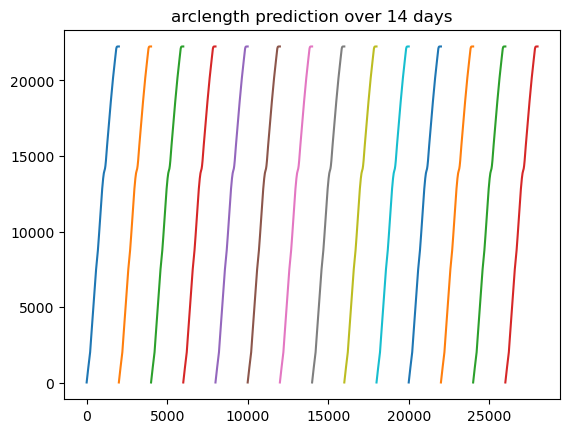

In [24]:
starting_point = cum_arclength[0]
print(starting_point)
arclens_14 = []
end_time = len(velocity) * 14  # each period is one day
for i in range(end_time // len(velocity)):
    t_eval = np.linspace(0, len(velocity), len(velocity))
    sol = solve_ivp(rbf_approx, [0, len(velocity)],  [starting_point], t_eval = t_eval, args=[centers, eps, C])
    sol.t = sol.t + i * len(velocity)
    arclens_14.append(sol.y[0,:])
    plt.plot(sol.t, sol.y[0,:])
plt.title("arclength prediction over 14 days")
arclens_14 = np.expand_dims(np.array(arclens_14).flatten(), 1)

In [31]:
target = dataset[:,1]
print(len(target))
arclen_trim = arclens_14[:target.shape[0]]
print(len(arclen_trim))
L = 1000
eps = 100
centers = np.linspace(0, len(target), L)
centers = arclen_trim[np.random.choice(range(arclen_trim.shape[0]), replace=False, size=L)]

phi, C, res = nonlin_func_approx(arclen_trim, target, centers=centers, eps=eps)
plt.plot(phi@C)



14000
14000


ValueError: XB must be a 2-dimensional array.